In [ ]:
using PotentialFlow
using Plots

using Interact

clibrary(:colorbrewer);
streamline_colors = cgrad([:black, :black]);
default(ratio = 1, legend = false);

INFO: Recompiling stale cache file /Users/darwin/.julia/lib/v0.6/PotentialFlow.ji for module PotentialFlow.


# The Doublet

Given a freestream in the $x$-direction, we want to place potential flow elements to form a cylinder centered at the origin.


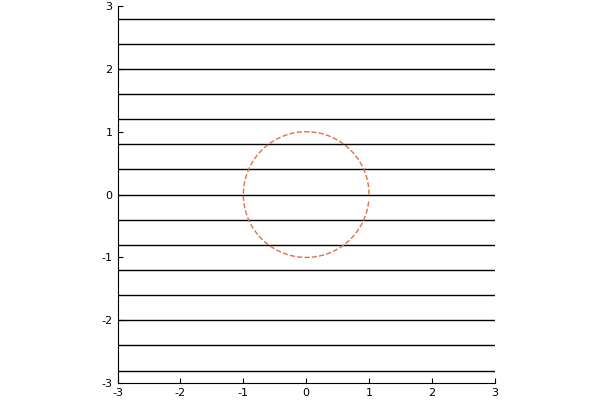

In [2]:
freestream = Freestream(1.0);
X = Y = linspace(-3, 3, 100)
streamlines(X, Y, freestream, color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Let's try to place a point vortex at the origin to redirect flow over/under the cylinder.

Interact.Options{:ToggleButtons,Any}(1: "input" = cw Any , "dir", :cw, "cw", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("cw"=>:cw,"ccw"=>:ccw), Dict{Any,Any}(Pair{Any,Any}(:cw, "cw"),Pair{Any,Any}(:ccw, "ccw"))), Any[], Any[], true, "horizontal")


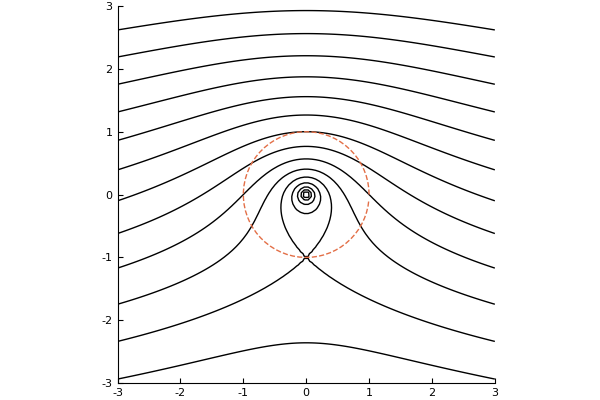

In [3]:
@manipulate for dir in [:cw, :ccw]
    point = Vortex.Point(0.0, dir == :cw ? -2π : 2π)
    streamlines(X, Y, ([point], freestream), color = streamline_colors)
    plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

So we want a CW vortex above the origin and a CCW vortex below the origin:

Interact.Options{:SelectionSlider,Any}(5: "input-2" = 0.4444444444444444 Any , "Δy", 0.4444444444444444, "0.4444444444444444", 5, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("0.0"=>0.0,"0.1111111111111111"=>0.111111,"0.2222222222222222"=>0.222222,"0.3333333333333333"=>0.333333,"0.4444444444444444"=>0.444444,"0.5555555555555556"=>0.555556,"0.6666666666666666"=>0.666667,"0.7777777777777778"=>0.777778,"0.8888888888888888"=>0.888889,"1.0"=>1.0…), Dict{Any,Any}(Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(0.333333, "0.3333333333333333"),Pair{Any,Any}(0.555556, "0.5555555555555556"),Pair{Any,Any}(0.222222, "0.2222222222222222"),Pair{Any,Any}(0.666667, "0.6666666666666666"),Pair{Any,Any}(0.777778, "0.7777777777777778"),Pair{Any,Any}(0.444444, "0.4444444444444444"),Pair{Any,Any}(0.111111, "0.1111111111111111"),Pair{Any,Any}(0.888889, "0.8888888888888888"),Pair{Any,Any}(1.0, "1.0")…)), Any[], Any[], true, "horizontal")


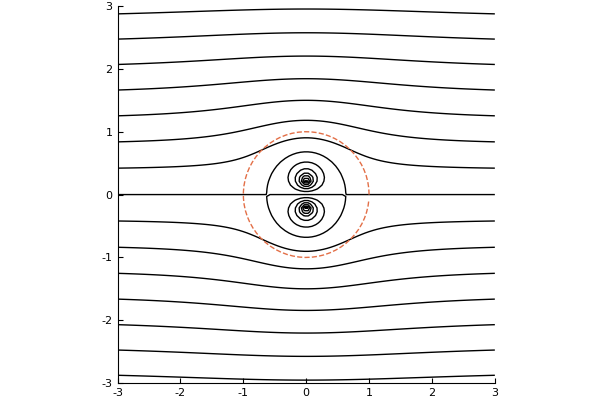

In [4]:
@manipulate for Δy in linspace(0, 1, 10)
point = Vortex.Point.(0.5Δy*[im, -im], [-2π, 2π])
streamlines(X, Y, (point, freestream), color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

We see that as we move the vortices closer, the closed streamline becomese more circular.
However, its radius becomes smaller.

Interact.Slider{Float64}(57: "input-20" = 1.0 Float64 , "", 1.0, 0.0:0.2222222222222222:2.0, "horizontal", true, ".3f", true)


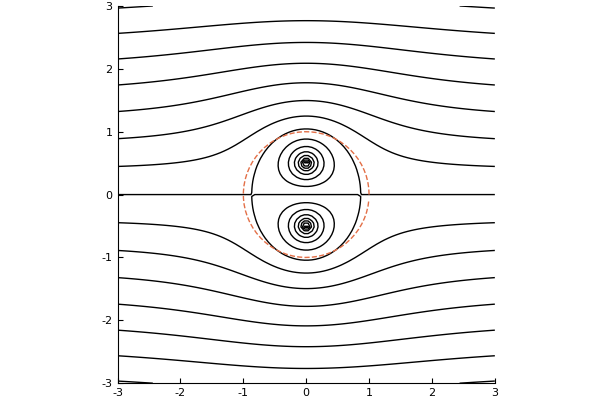

In [63]:
@manipulate for Δy = slider(linspace(0, 2, 10), value = 1.0)
points = Vortex.Point.(0.5Δy*[im, -im], [-2π, 2π]./Δy)
streamlines(X, Y, (points, freestream), color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end

We can scale their circulations to be inversely proportional to their distance.
Taking the limit as their distance go to zero, we get a **doublet**.


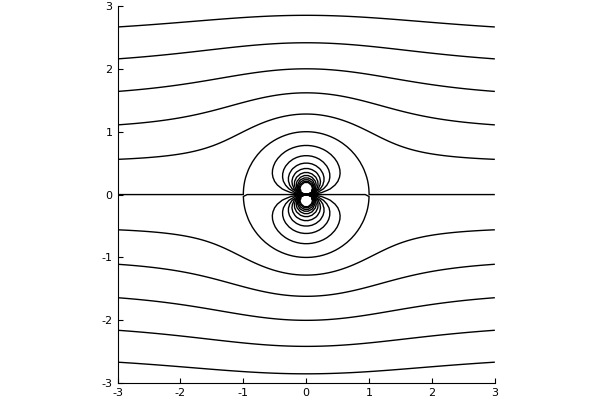

In [65]:
doublet = PotentialFlow.Doublets.Doublet(0.0im, π)
streamlines(X, Y, [freestream, doublet], levels = linspace(-5, 5, 21), color = streamline_colors)

# Method of Images

In the previous discussion, we talked about how we can create flow obstacles using source/vortex sheets.
Another way to deal with solid surfaces in potential flow is to take advantage of certain flow symmetries.

Two point vortices with opposite signed circulation placed across the $x$-axis will eliminate the vertical velocities along the $x$-axis


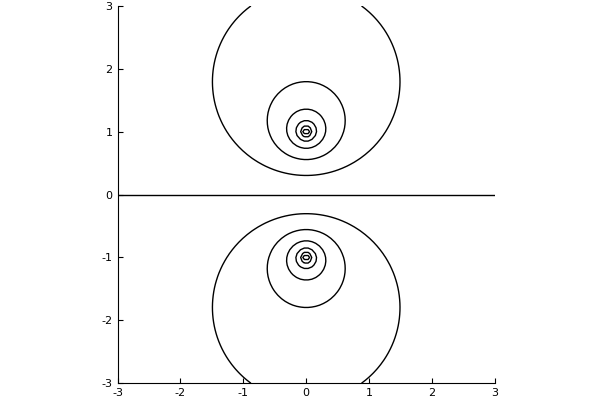

In [68]:
points = Vortex.Point.([im, -im], [1, -1])
streamlines(X, Y, points, color = streamline_colors)

## How would we set up a system of images to find the streamlines of a point vortex near a corner?

Interact.Options{:SelectionSlider,Any}(49: "input-17" = 0.0 Any , "Γ₂", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-1.0"=>-1.0,"-0.96"=>-0.96,"-0.92"=>-0.92,"-0.88"=>-0.88,"-0.84"=>-0.84,"-0.8"=>-0.8,"-0.76"=>-0.76,"-0.72"=>-0.72,"-0.68"=>-0.68,"-0.64"=>-0.64…), Dict{Any,Any}(Pair{Any,Any}(-0.92, "-0.92"),Pair{Any,Any}(-0.28, "-0.28"),Pair{Any,Any}(-0.04, "-0.04"),Pair{Any,Any}(0.56, "0.56"),Pair{Any,Any}(-0.32, "-0.32"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(-0.68, "-0.68"),Pair{Any,Any}(-0.96, "-0.96"),Pair{Any,Any}(0.48, "0.48"),Pair{Any,Any}(-0.8, "-0.8")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(51: "input-18" = 0.0 Any , "Γ₃", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-1.0"=>-1.0,"-0.96"=>-0.96,"-0.92"=>-0.92,"-0.88"=>-0.88,"-0.84"=>-0.84,"-0.8"=>-0.8,"-0.76"=>-0.76,"-0.72"=>-0.72,"-0.68"=>-0.68,"-0.64"=>-0.64…), Dict{Any,Any}(Pair{Any,Any}(-0.92, "-0.92"),Pair{Any,Any}(-0.28, "-0.28"),Pair{Any,Any}(-0.04, "-0.04"),Pair{Any,Any}(0.56, "0.56"),Pair{Any,Any}(-0.32, "-0.32"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(-0.68, "-0.68"),Pair{Any,Any}(-0.96, "-0.96"),Pair{Any,Any}(0.48, "0.48"),Pair{Any,Any}(-0.8, "-0.8")…)), Any[], Any[], true, "horizontal")

Interact.Options{:SelectionSlider,Any}(53: "input-19" = 0.0 Any , "Γ₄", 0.0, "0.0", 26, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-1.0"=>-1.0,"-0.96"=>-0.96,"-0.92"=>-0.92,"-0.88"=>-0.88,"-0.84"=>-0.84,"-0.8"=>-0.8,"-0.76"=>-0.76,"-0.72"=>-0.72,"-0.68"=>-0.68,"-0.64"=>-0.64…), Dict{Any,Any}(Pair{Any,Any}(-0.92, "-0.92"),Pair{Any,Any}(-0.28, "-0.28"),Pair{Any,Any}(-0.04, "-0.04"),Pair{Any,Any}(0.56, "0.56"),Pair{Any,Any}(-0.32, "-0.32"),Pair{Any,Any}(0.2, "0.2"),Pair{Any,Any}(-0.68, "-0.68"),Pair{Any,Any}(-0.96, "-0.96"),Pair{Any,Any}(0.48, "0.48"),Pair{Any,Any}(-0.8, "-0.8")…)), Any[], Any[], true, "horizontal")


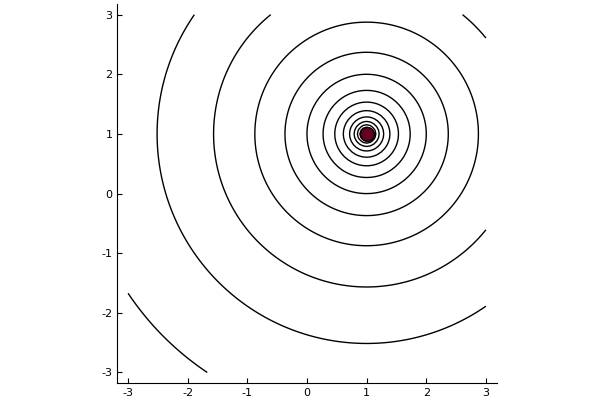

In [62]:
Γ₁ = 1.0
zs = [1 + im, -1 + im, -1 - im, 1 - im]
@manipulate for Γ₂ in linspace(-Γ₁, Γ₁, 51),
                Γ₃ in linspace(-Γ₁, Γ₁, 51),
                Γ₄ in linspace(-Γ₁, Γ₁, 51)
    points = Vortex.Point.(zs, [Γ₁, Γ₂, Γ₃, Γ₄])
    streamlines(X, Y, points, color = streamline_colors)
    plot!(points, markersize = 10, color = :RdBu)
end

In [ ]:
Let's go back to the simple 2 point vortex case:


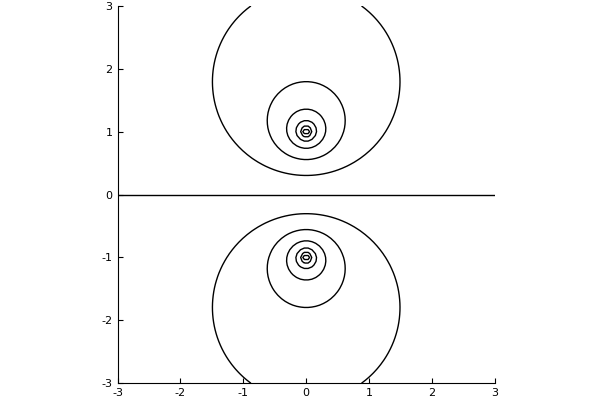

In [71]:
points = Vortex.Point.([im, -im], [1, -1])
streamlines(X, Y, points, color = streamline_colors)

Now let's move these pair of vortices so that we shift and rotate our wall


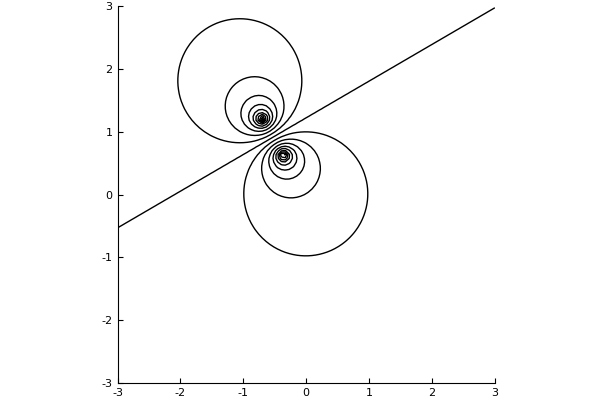

In [82]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (point, image), levels = linspace(-5, 5, 31), color = streamline_colors)

Notice how the contours form closed circles:


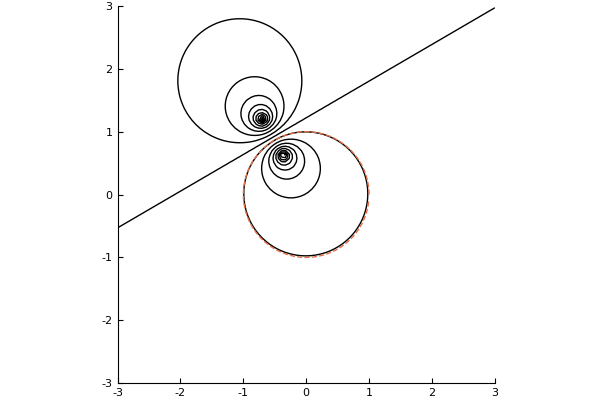

In [81]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (point, image), levels = linspace(-5, 5, 31), color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Since these streamlines are just contours showing curves with equal streamfunction values, the marked cylinder can be preserved if we superimpose another potential flow field that also has the cylinder as a closed streamline.


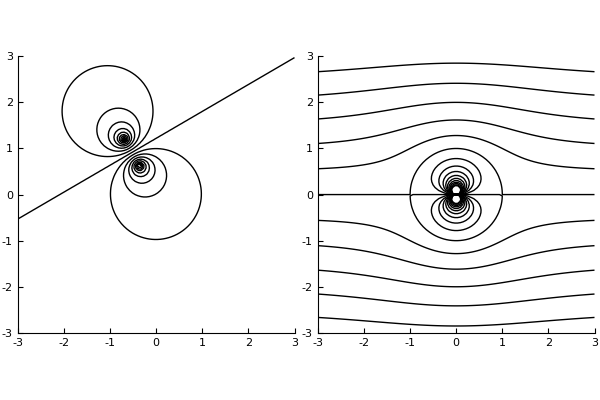

In [103]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
images = streamlines(X, Y, (point, image), levels = linspace(-5, 5, 31), color = streamline_colors)
cylinder = streamlines(X, Y, [freestream, doublet], levels = linspace(-5, 5, 21), color = streamline_colors)
plot(images, cylinder, layout = (1, 2))


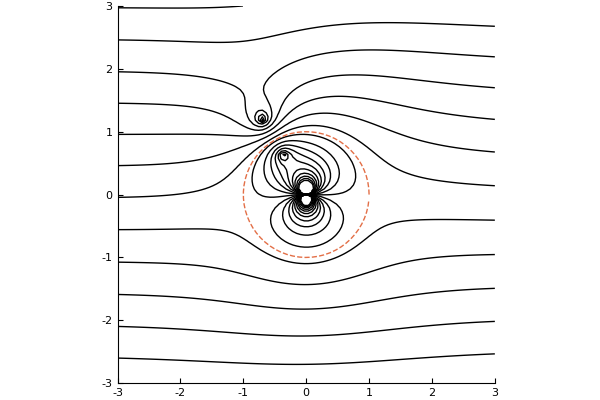

In [80]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
image = Vortex.Point(conj(1/point.z), -2π)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point, image), levels = linspace(-5, 5, 21), color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

Let's consider another approach to the same result.
Imagine if we had a perfectly good cylinder flow.
Then we deicde to put a vortex somewhere outside.


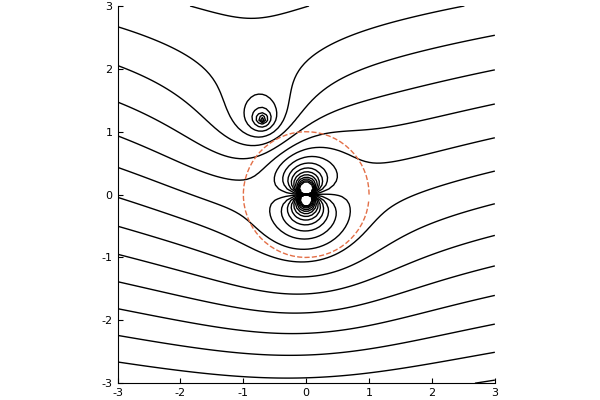

In [79]:
point = Vortex.Point(-0.7 + 1.2im, 2π)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point), levels = linspace(-5, 5, 21), color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)

We now want to place an image vortex that would reform the wall of the cylinder:

Interact.Options{:SelectionSlider,Any}(61: "input-21" = 0.0 Any , "x", 0.0, "0.0", 11, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("-2.0"=>-2.0,"-1.8"=>-1.8,"-1.6"=>-1.6,"-1.4"=>-1.4,"-1.2"=>-1.2,"-1.0"=>-1.0,"-0.8"=>-0.8,"-0.6"=>-0.6,"-0.4"=>-0.4,"-0.2"=>-0.2…), Dict{Any,Any}(Pair{Any,Any}(1.0, "1.0"),Pair{Any,Any}(1.2, "1.2"),Pair{Any,Any}(2.0, "2.0"),Pair{Any,Any}(-0.2, "-0.2"),Pair{Any,Any}(-1.0, "-1.0"),Pair{Any,Any}(-0.6, "-0.6"),Pair{Any,Any}(-1.6, "-1.6"),Pair{Any,Any}(1.4, "1.4"),Pair{Any,Any}(0.0, "0.0"),Pair{Any,Any}(-1.2, "-1.2")…)), Any[], Any[], true, "horizontal")


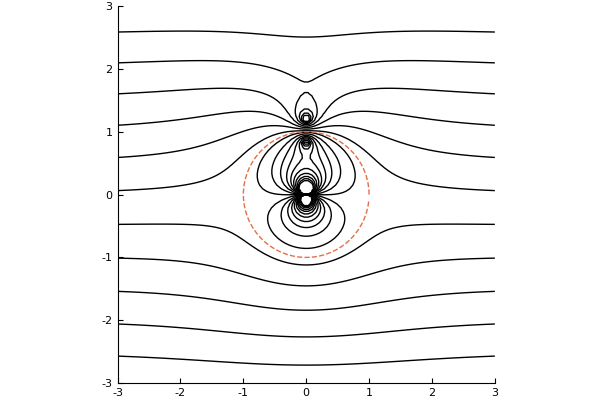

In [105]:
@manipulate for x in linspace(-2, 2, 21)
point = Vortex.Point(x + 1.2im, 10)
image = Vortex.Point(conj(1/point.z), -10)
streamlines(X, Y, (freestream, PotentialFlow.Doublets.Doublet(0.0im, π), point, image), levels = linspace(-5, 5, 21), color = streamline_colors)
plot!(cos.(0:0.1:2π), sin.(0:0.1:2π), linestyle = :dash)
end